**UPLOADING THE DATA**

In [1]:
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart.csv


**IMPORTING THE DATASET TO PANDA**

In [25]:
import io
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
Data = pd.read_csv(io.BytesIO(uploaded['heart.csv']))
print(Data.head(20))

    age  sex  cp  trestbps  chol  fbs  ...  exang  oldpeak  slope  ca  thal  target
0    63    1   3       145   233    1  ...      0      2.3      0   0     1       1
1    37    1   2       130   250    0  ...      0      3.5      0   0     2       1
2    41    0   1       130   204    0  ...      0      1.4      2   0     2       1
3    56    1   1       120   236    0  ...      0      0.8      2   0     2       1
4    57    0   0       120   354    0  ...      1      0.6      2   0     2       1
5    57    1   0       140   192    0  ...      0      0.4      1   0     1       1
6    56    0   1       140   294    0  ...      0      1.3      1   0     2       1
7    44    1   1       120   263    0  ...      0      0.0      2   0     3       1
8    52    1   2       172   199    1  ...      0      0.5      2   0     3       1
9    57    1   2       150   168    0  ...      0      1.6      2   0     2       1
10   54    1   0       140   239    0  ...      0      1.2      2   0     2 

In [4]:
type(Data)

pandas.core.frame.DataFrame

In [5]:
Data.shape

(303, 14)

**DESCRIPTION**

In [10]:
Data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


**DATA ANALYSIS**  
ANALYSING THE 'TARGET' VARIABLE

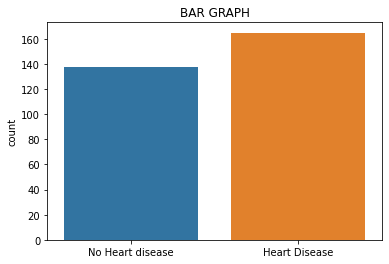

In [7]:
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
f = sns.countplot(x='target', data=Data)
f.set_title("BAR GRAPH")
f.set_xticklabels(['No Heart disease', 'Heart Disease'])
plt.xlabel("");

EXTENDED DISTRIBUTION OF HEART DISEASE BY GENDER - Sex feature

In [8]:
Data["sex"].unique()

array([1, 0])

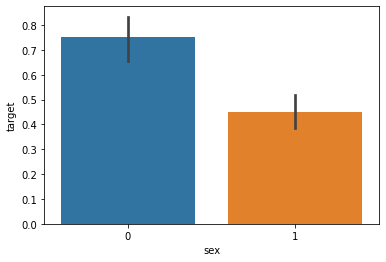

In [9]:
sns.barplot(data=Data,x='sex',y='target')

**it is obversed as females are more likely to have heart problems than males**

ANALYSING THE 'Chest Pain Type' feature

In [11]:
Data["cp"].unique()

array([3, 2, 1, 0])

**it has values from 0 to 3**

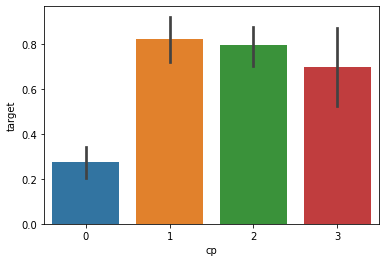

In [12]:
sns.barplot(data=Data,x='cp',y='target')

**observed that chest pain of '0' are much less likely to have problems**

ANALYSING THE 'FBS' FEATURE

In [13]:
Data["fbs"].unique()

array([1, 0])

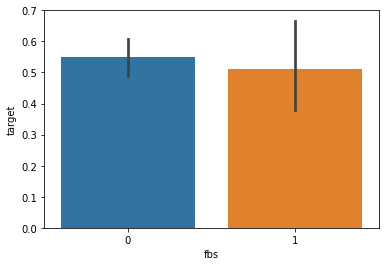

In [14]:
sns.barplot(data=Data,x='fbs',y='target')

**Not so much difference it has**

ANALYSING THE 'restecg' feature

In [15]:
Data["restecg"].unique()

array([0, 1, 2])

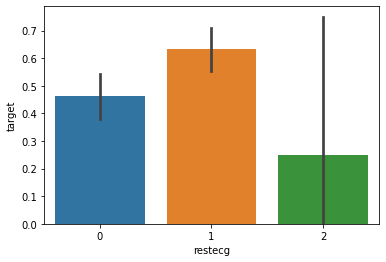

In [16]:
sns.barplot(data=Data,x='restecg',y='target')

**here people with restecg '1' and '0' are much more likely to have a heart disease than with restecg '2'**

ANALYSING THE 'exang' FEATURE

In [17]:
Data["exang"].unique()

array([0, 1])

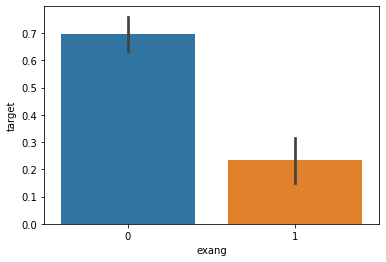

In [18]:
sns.barplot(data=Data,x='exang',y='target')

**People with exang=1 are much less likely to have heart problems**

ANALYSING THE 'Slope' FEATURE

In [19]:
Data["slope"].unique()

array([0, 2, 1])

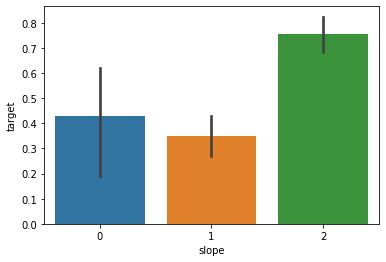

In [20]:
sns.barplot(data=Data,x='slope',y='target')

**observe, that Slope '2' causes heart pain much more than Slope '0' and '1'**

ANALYSING THE 'ca' FEATURE

In [21]:
Data["ca"].unique()

array([0, 2, 1, 3, 4])

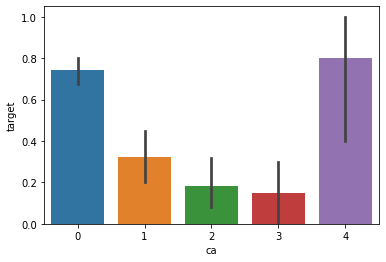

In [22]:
sns.barplot(data=Data,x='ca',y='target')

**ca=4 has astonishingly large number of heart patients**

ANALYSING THE 'thal' FEATURE

In [23]:
Data["thal"].unique()

array([1, 2, 3, 0])

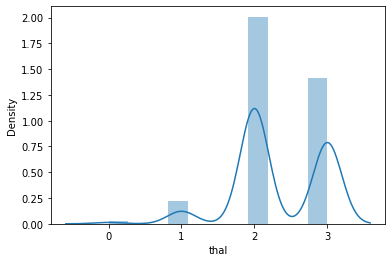

In [26]:
sns.distplot(Data["thal"])

**COORELATION MATRIX**

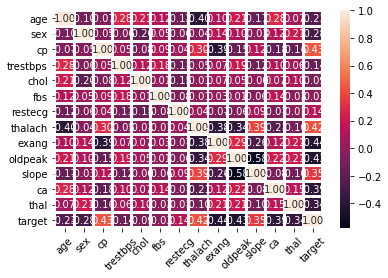

In [27]:
heat_map = sns.heatmap(Data.corr(method='pearson'), annot=True, fmt='.2f', linewidths=2)
heat_map.set_xticklabels(heat_map.get_xticklabels(), rotation=45);
plt.rcParams["figure.figsize"] = (50,50)

**TRAIN TEST SPLIT**

In [28]:
from sklearn.model_selection import train_test_split

predictors = Data.drop("target",axis=1)
target = Data["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(242, 13)
(61, 13)
(242,)
(61,)


**MODEL FITTING**

In [29]:
from sklearn.metrics import accuracy_score

**RANDOM FOREST** 

In [30]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
print(max_accuracy)
print(best_x)


90.16
323


In [31]:
rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

In [32]:
Y_pred_rf.shape

(61,)

**ACCURACY OF THE MODEL**

In [33]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Random forest is: "+str(score_rf)+" %")

The accuracy score achieved using Random forest is: 90.16 %
